# Анализ рынка компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Изучение данных

In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import pandas as pd
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [4]:
df.duplicated().sum() # проверяем на наличие дубликатов

0

### Вывод

Можно отметить следующее:

- имеются пропуски в данных
- названия колонок не в "змеинном" регистре
- в некотрых колонках нужно изменить тип данных
- дубликатов не имеется

In [5]:
df = df.rename(columns={'Name':'name',
                       'Platform':'platform',
                       'Year_of_Release':'year_of_release',
                       'Genre':'genre',
                       'NA_sales':'na_sales',
                       'EU_sales':'eu_sales',
                       'JP_sales':'jp_sales',
                       'Other_sales':'other_sales',
                       'Critic_Score':'critic_score',
                       'User_Score':'user_score',
                       'Rating':'rating'}
              )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В столбце 'year_of_release' нецелочисленный тип данных, колонку с годами нужно превести в тип int

In [6]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В колонке 'user_score' нечисловой формат, переведём оценки в тип float

In [7]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Рассмотрим пропуски в столбцах**

Столбец 'name'

In [8]:
df[df['name']. isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Логика в пропусках не прослеживается (ошибка при выводе данных), и пропуска всего 2, что никак не повлияет на исслеование, так что удалим эти строчки 

In [9]:
df = df.dropna(subset=['name'])
df['name'].isna().sum()

0

Столбец 'year_of_release'

In [10]:
df[df['year_of_release']. isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Логика в пропусках не прослеживается (ошибка при выводе данных), и доля пропусков незначительна(1.6%), что никак не повлияет на исслеование, так что удалим эти строчки

In [11]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'].isna().sum()

0

Столбец 'genre'

Пропуски в данном столбце удалились, так как они были там же, где и пропуски столбца 'name'

In [12]:
df['genre'].isna().sum()

0

Столбецы 'critic_score', 'user_score'

In [13]:
df[df['critic_score']. isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Столбец raiting

In [14]:
df['rating']= df['rating'].fillna("no_ESRB")

Данные столбцы имеют значительное количество пропусков, но заменить мы их не можем, так как невозможно рационально подобрать подходящий метод. Поэтому оставляем без изменений

Аббревиатура TBD  используется если какая-то информация не определена. Служит для отметки неясностей. В данной ситуации можно предположить, что это связано, например, с подозрительными данными (накрутка рейтингов). Здесь я приняла решение заменить на NaN (см. строчку 7), так как у меня нет никакой дополнительной информации для заполнения.

## Исследовательский анализ данных

**Посчитаем суммарные продажи во всех регионах**

In [15]:
df['summ'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summ
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_ESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_ESRB,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_ESRB,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_ESRB,28.31


Посмотрим **сколько игр выпускалось в разные годы**:

In [16]:
from_year = df.groupby('year_of_release')['name'].count()
from_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [17]:
from_year.describe()

count      37.000000
mean      444.432432
std       451.604334
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: name, dtype: float64

<AxesSubplot:xlabel='year_of_release'>

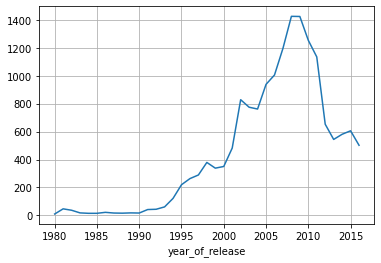

In [18]:
from_year.plot(style='-', grid=True)

На рисунке видно, что пик достигается 2008 году, график идёт на спад после 2009

Сотавим топ популярных платформ, основываясь на данных о продаже:

In [19]:
top_platform = df.groupby(['platform'])['summ'].sum()
top_platform = top_platform.sort_values(ascending=False)
top_platform.head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: summ, dtype: float64

Построем распределение по годам:

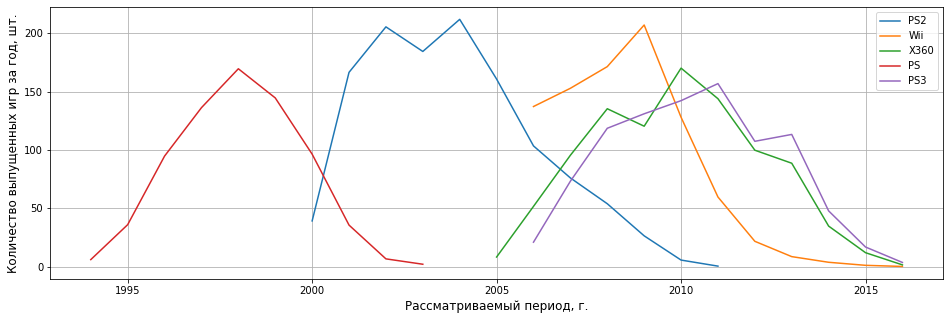

In [20]:
df_top =(
    df.pivot_table(index=['platform', 'year_of_release'], values='summ', aggfunc='sum')
    .unstack('platform').reset_index()
)

years = df_top['year_of_release']
ps2 = df_top['summ']['PS2']
wii = df_top['summ']['Wii']
x360 = df_top['summ']['X360']
ps = df_top['summ']['PS']
ps3 = df_top['summ']['PS3']

plt.figure(figsize=(16, 5))
plt.plot(years, ps2, '-', label='PS2')
plt.plot(years, wii, '-', label='Wii')
plt.plot(years, x360, '-', label='X360')
plt.plot(years, ps, '-', label='PS')
plt.plot(years, ps3, '-', label='PS3')

plt.xlabel('Рассматриваемый период, г.', fontsize='large')
plt.ylabel('Количество выпущенных игр за год, шт.', fontsize='large')
plt.legend()
plt.grid()
plt.show()



На данном графике наглядно видно, что появляются новые и исчезают старые платформы, примерно, в период 10 лет. Однако стоит подметить, что сначала идет резкий рост продаж, перевал, затем спад.

<div class="alert alert-warning">
<b font-size: 24pt>Совет</b><br /><br />
Для подсчета среднего срока жизни платформы можно было использовать следующий подход: сгруппировать наблюдения по платформам, вывести минимальный и максимальный год релиза, добавить столбец, где будет подсчитана разница между ними. После всего этого дело за малым — посмотреть среднее, а лучше медианы по столбцу разницы.
</div>

Опеделим туальным период:
- на общем граике мы наблюдали резки спад выпускаемых игр начиная с 2009 года
- при расмотрение динамике продаж популярных платформ, имеется спад начиная с 2013 года

Поэтому возьмём период с 2013 года

In [21]:
actual_df = df.query('year_of_release > 2013')
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summ
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_ESRB,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_ESRB,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_ESRB,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01


In [22]:
top_trade = actual_df.groupby('platform')['summ'].sum()
top_trade = top_trade.sort_values(ascending=False)
top_trade.head()

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
Name: summ, dtype: float64

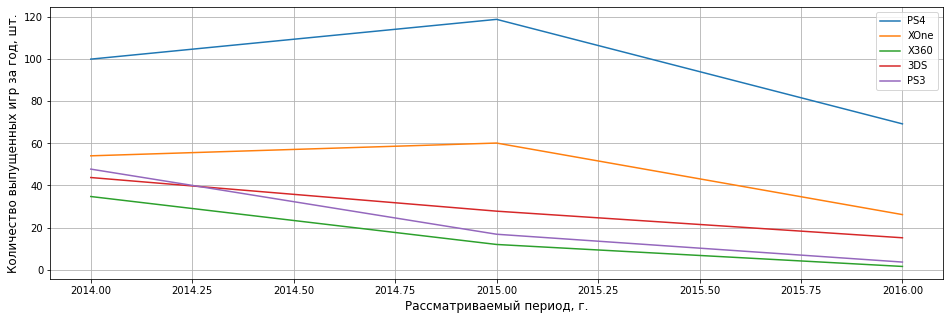

In [23]:
df_tops =(
    actual_df.pivot_table(index=['platform', 'year_of_release'], values='summ', aggfunc='sum')
    .unstack('platform').reset_index()
)

years = df_tops['year_of_release']
ps4 = df_tops['summ']['PS4']
xone = df_tops['summ']['XOne']
ds3 = df_tops['summ']['3DS']
x360 = df_tops['summ']['X360']
ps3 = df_tops['summ']['PS3']

plt.figure(figsize=(16, 5))
plt.plot(years, ps4, '-', label='PS4')
plt.plot(years, xone, '-', label='XOne')
plt.plot(years, x360, '-', label='X360')
plt.plot(years, ds3, '-', label='3DS')
plt.plot(years, ps3, '-', label='PS3')

plt.xlabel('Рассматриваемый период, г.', fontsize='large')
plt.ylabel('Количество выпущенных игр за год, шт.', fontsize='large')
plt.legend()
plt.grid()
plt.show()



### Вывод

Подведём итоги:
1. Лидером по продаже является платформа 'PS4'
2. После 2015 года у всех (топ 5) платформ объём продаж снижаются
3. Если учитывать предыдущий вывод о жизненном цикле, то потенциально прибыльных платформ можно выделить 'PS4', в качестве свежей платформой. (Достачно сложный вопрос, у нас мало данных, чтобы судить о прибыльности)

Text(0, 0.5, 'Общий объём продаж, д.е.')

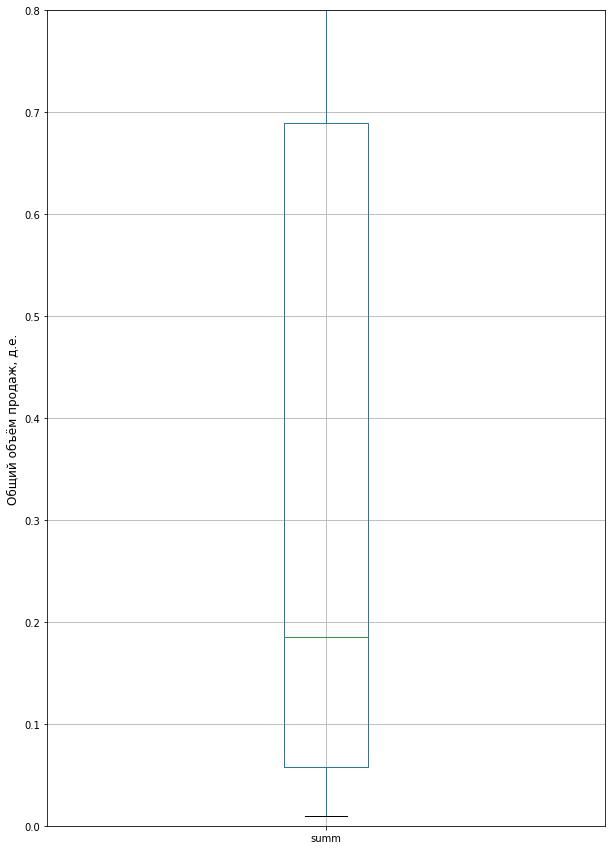

In [24]:
actual_df.query('platform == "PS4"').boxplot(figsize=(10, 15), column="summ")
plt.ylim(0, 0.8)
plt.ylabel('Общий объём продаж, д.е.', fontsize='large')

Text(0, 0.5, 'Общий объём продаж, д.е.')

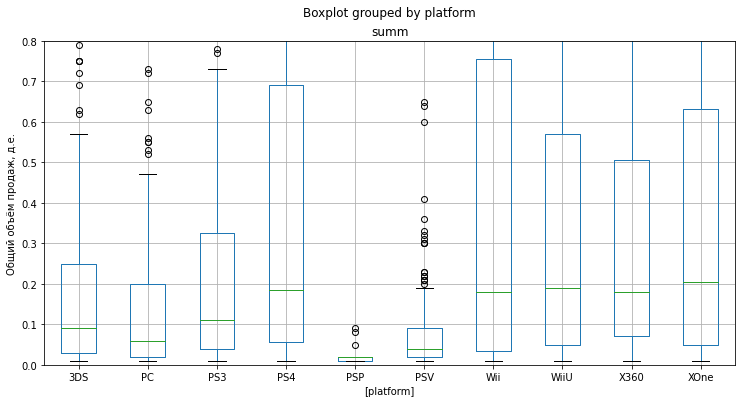

In [25]:
pl = actual_df.pivot_table(index=['platform', 'name'], values='summ')
pl.boxplot(by='platform', figsize=(12,6))
plt.ylim(0, 0.8)
plt.ylabel('Общий объём продаж, д.е.')

In [26]:
pl

summ
platform name                             
3DS       Beyblade Burst              0.03
          Fire Emblem Fates           1.67
          Haikyu!! Cross Team Match!  0.04
         12-Sai. Honto no Kimochi     0.07
         12-Sai. Koisuru Diary        0.05
...                                    ...
XOne     Wolfenstein: The Old Blood   0.15
         Worms: WMD                   0.01
         XCOM 2                       0.04
         ZombiU                       0.01
         Zombie Army Trilogy          0.11

[1689 rows x 1 columns]

In [27]:
actual_df.query('platform == "PS4"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,summ
count,376.000000,376.000000,376.000000,376.000000,376.000000,237.000000,242.000000,376.000000
mean,2015.236702,0.262261,0.345851,0.039947,0.118298,72.164557,6.828099,0.766356
std,0.762336,0.583439,0.815480,0.067048,0.256506,12.214985,1.399035,1.614969
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,66.000000,6.200000,0.057500
50%,2015.000000,0.050000,0.070000,0.015000,0.020000,73.000000,7.100000,0.185000
75%,2016.000000,0.240000,0.280000,0.050000,0.102500,80.000000,7.875000,0.690000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,14.630000


Можно увидеть что большая часть лежит в диапозоне от 0 до 1. Нижний "ус" около 0, верхний - примерно 1.6. И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана  не стремится к длинному хвосту высоких значений.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков:

In [28]:
for_matrix = actual_df.query('platform == "PS4"').pivot_table(index='other_sales', values=['critic_score', 'user_score', 'summ'])
for_matrix

,critic_score,summ,user_score
other_sales,,,
0.00,64.142857,0.047917,6.747368
0.01,69.355556,0.066923,6.819565
0.02,68.565217,0.137586,7.122727
0.03,60.300000,0.222778,6.172727
0.04,71.153846,0.268571,7.357143
...,...,...,...
1.13,87.000000,7.170000,6.500000
1.23,83.000000,7.660000,5.700000
1.28,82.000000,8.280000,4.300000


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='summ', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='summ'>,
        <AxesSubplot:xlabel='summ', ylabel='summ'>,
        <AxesSubplot:xlabel='user_score', ylabel='summ'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='summ', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

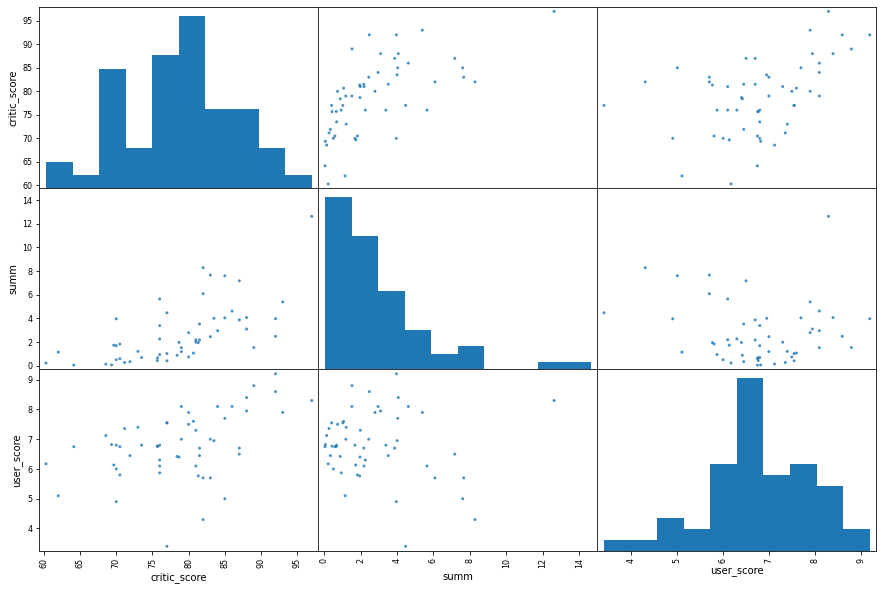

In [29]:
pd.plotting.scatter_matrix(for_matrix, figsize=(15, 10), alpha=0.8)

In [30]:
actual_df.query('platform == "PS4"')['summ'].corr(actual_df.query('platform == "PS4"')['critic_score'])

0.40266141068104083

И график и коэффицент корреляции говорят о умеренной связи, что означает оценки критиков прямо влияют на объём продаж(чем выше оценка, тем выше объём продаж)

In [31]:
actual_df.query('platform == "PS4"')['summ'].corr(actual_df.query('platform == "PS4"')['user_score'])

-0.040131589472697356

И график и коэффицент корреляции говорят о низкой связи, что означает оценки игроков не влияют на объём продаж(возможно связано, что критика пользователе не имеет такого сильного доверия)

**Соотнесем с данными  мене популярных платформ:**

In [32]:
for_other_matrix = actual_df.query('platform != "PS4"').pivot_table(index='other_sales', values=['critic_score', 'user_score', 'summ'])
for_other_matrix.head()

,critic_score,summ,user_score
other_sales,,,
0.00,68.147059,0.063299,6.670760
0.01,70.110092,0.124709,6.663121
0.02,71.716667,0.220374,6.371429
0.03,73.342857,0.327407,6.276596
0.04,76.666667,0.459815,6.735000


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='summ', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='summ'>,
        <AxesSubplot:xlabel='summ', ylabel='summ'>,
        <AxesSubplot:xlabel='user_score', ylabel='summ'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='summ', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

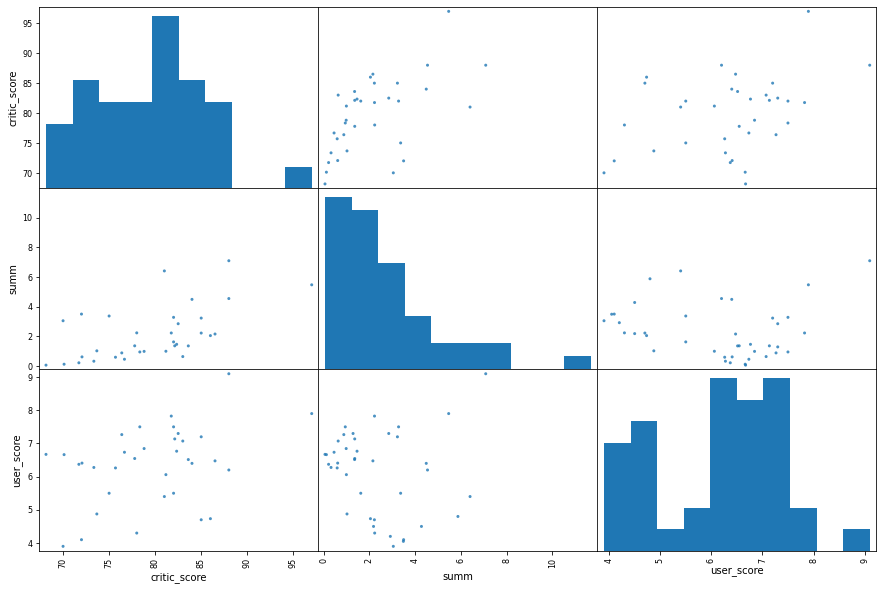

In [33]:
pd.plotting.scatter_matrix(for_other_matrix, figsize=(15, 10), alpha=0.8)

In [34]:
actual_df.query('platform != "PS4"')['summ'].corr(actual_df.query('platform != "PS4"')['critic_score'])

0.30947400260011515

In [35]:
actual_df.query('platform != "PS4"')['summ'].corr(actual_df.query('platform != "PS4"')['user_score'])

-0.023478187237975554

Корреляция у других платформ почти одинакова

**Посмотрим на общее распределение игр по жанрам:**

<AxesSubplot:xlabel='genre'>

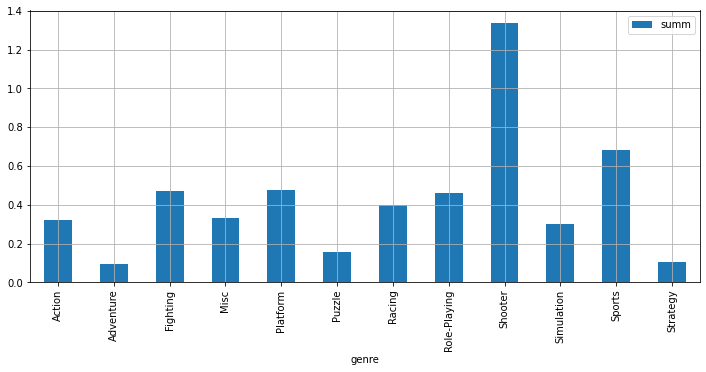

In [36]:
actual_df.pivot_table(index='genre', values='summ').plot(grid=True, figsize=(12, 5), kind='bar')

### Вывод

Самым продаваемым жанром является shooter, самым непоппулярным - жанр adventure. Можно выделеть топ 5 самых продаваемых жанров и считать ,на основе этого топа, наиболее прибыльными:
- shooter
- sports
- fighting
- platform 
- role-playing

## Составим портрет пользователя каждого региона

### Составаим портрет пользователя каждого региона по платформам:

Регион Северной Америки:

In [37]:
top_na = actual_df.groupby('platform')['na_sales'].sum()
top_na= top_na.sort_values(ascending=False)
top_na.head()

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

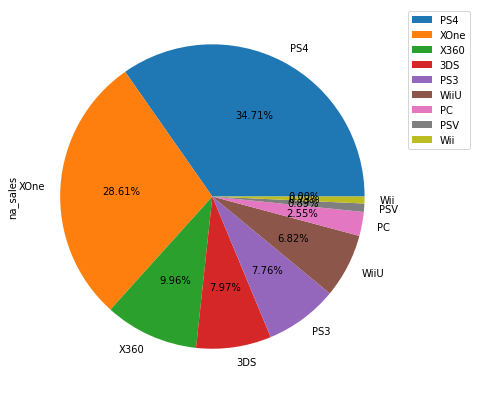

In [38]:
top_na.plot(kind='pie', autopct='%1.2f%%', figsize=(8, 7))
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

Регион Европы:

In [39]:
top_eu = actual_df.groupby('platform')['eu_sales'].sum()
top_eu= top_eu.sort_values(ascending=False)
top_eu.head()

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

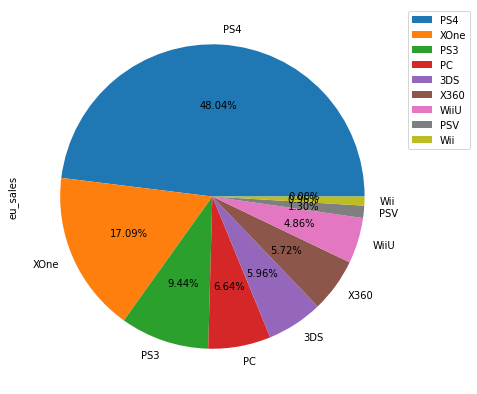

In [40]:
top_eu.plot(kind='pie', autopct='%1.2f%%', figsize=(8, 7))
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

Регион Японии:

In [41]:
top_jp = actual_df.groupby('platform')['jp_sales'].sum()
top_jp= top_jp.sort_values(ascending=False)
top_jp.head()

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

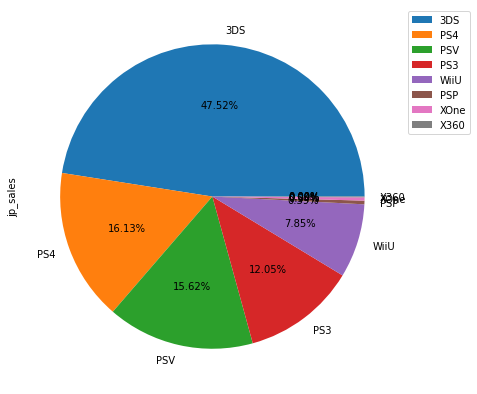

In [42]:
top_jp.plot(kind='pie', autopct='%1.2f%%', figsize=(8, 7))
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

### Вывод

Таким образом по платформам:

Топ 5 в **Северной Америки**:

- PS4 ~ 35%
- XOne ~ 39%
- X360 ~ 10%
- 3DS ~ 8%
- PS3 ~ 8%

Топ 5 в **Европе**:

- PS4 ~ 49%
- XOne ~ 17%
- PS3 ~ 5% 
- РС ~ 7%
- 3DS ~ 6%

Топ 5 в **Японии**:

- 3DS ~ 48%
- PS4 ~ 16%
- PSV ~ 16%
- PS3 ~ 12%
- WiiU ~ 8%




<div class="alert alert-success">
<b font-size: 24pt>Успех</b><br /><br />
Очень удачный выбор графиков для данного шага. С результатами согласен
</div>

### Составаим портрет пользователя каждого региона по жанру:

Регион Северной Америки:

In [43]:
g_na = actual_df.groupby('genre')['na_sales'].sum()
g_na= g_na.sort_values(ascending=False)
g_na.head()

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

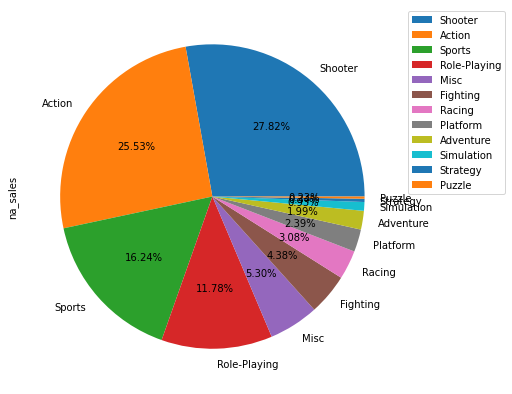

In [44]:
g_na.plot(kind='pie', autopct='%1.2f%%', figsize=(8, 7))
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

Регион Европы:

In [45]:
g_eu = actual_df.groupby('genre')['eu_sales'].sum()
g_eu= g_eu.sort_values(ascending=False)
g_eu.head()

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

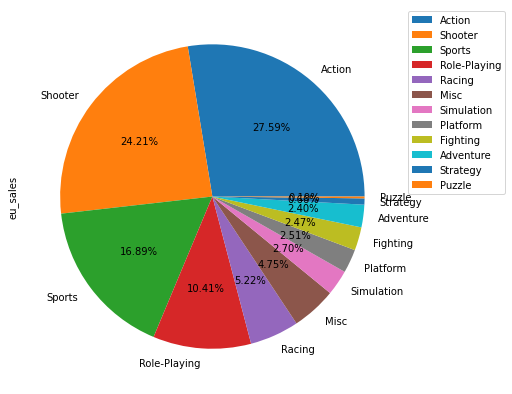

In [46]:
g_eu.plot(kind='pie', autopct='%1.2f%%', figsize=(8, 7))
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

Регион Японии:

In [47]:
g_jp = actual_df.groupby('genre')['eu_sales'].sum()
g_jp= g_jp.sort_values(ascending=False)
g_jp.head()

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

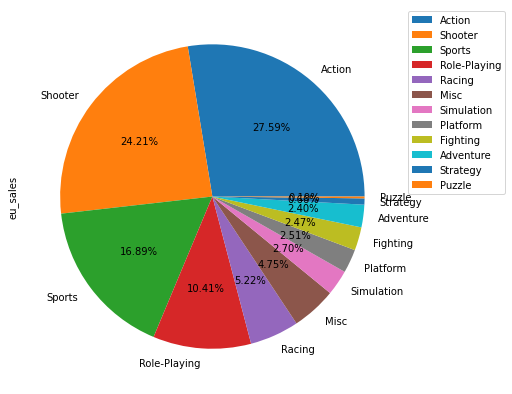

In [48]:
g_jp.plot(kind='pie', autopct='%1.2f%%', figsize=(8, 7))
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

### Вывод

Таким образом по жанрам:

Топ 5 в **Северной Америки**:

- Shooter ~ 28%
- Action ~ 26%
- Sports ~ 16%
- Role-Playing ~ 12%
- Misc ~ 5%

Топ 5 в **Европе**:

- Action ~ 28%
- Shooter ~ 24%
- Sports ~ 17%
- Role-Playing ~ 11%
- Racing ~ 5%

Топ 5 в **Японии**:

- Action ~ 28%
- Shooter ~ 24%
- Sports ~ 17%
- Role-Playing ~ 10%
- Racing ~ 5%

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [49]:
rating_na = actual_df.groupby('rating')['na_sales'].sum()
rating_na.sort_values(ascending = False)

rating
M          96.42
no_ESRB    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

<AxesSubplot:xlabel='rating'>

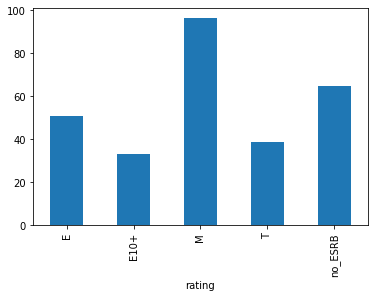

In [50]:
rating_na.plot(kind='bar')

Самым популярным в Северной Аереки являются игры с рейтингом М (согласно Википедии, 17+), наимеьшим, судя по объёму продаж, являются игры с рейтингом Е10+ (согласно Википедии, 10+).

In [51]:
rating_eu = actual_df.groupby('rating')['eu_sales'].sum()
rating_eu.sort_values(ascending = False)

rating
M          93.44
no_ESRB    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

<AxesSubplot:xlabel='rating'>

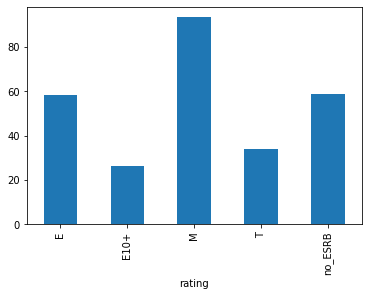

In [52]:
rating_eu.plot(kind='bar')

Самым популярным в Европе являются игры с рейтингом М (согласно Википедии, 17+), наимеьшим, судя по объёму продаж, являются игры с рейтингом Е10+ (согласно Википедии, 10+).

In [53]:
rating_jp = actual_df.groupby('rating')['jp_sales'].sum()
rating_jp.sort_values(ascending = False)

rating
no_ESRB    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

<AxesSubplot:xlabel='rating'>

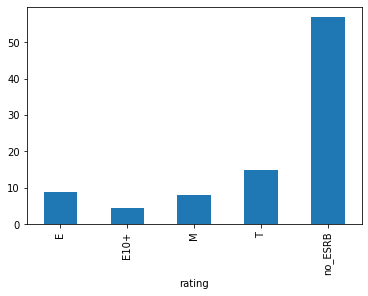

In [54]:
rating_jp.plot(kind='bar')

Самым популярным в Японии являются игры без рейтинга. Возможно это говорит о том, что в Японии не учитывают рейтинг  ESRB. Меньше всего игр с рейтингом  Е10+ (согласно Википедии, 10+).

### Вывод

Подведем итоги:

- рейтинг ESRB одинаково влияет на объём продаж в Северной Америке, Европе
- в Японии данный рейтинг не влияет на обьем продаж, самые популярные игры - игры без рейтинга

## Проверим гипотезы

### Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC разные.
- Для проверки гипотезы нам понадобятся данные пользовательских оценок платформ XOne и РС.

In [55]:
mean_xone = actual_df.query('platform =="XOne"') 

In [56]:
mean_pc = actual_df.query('platform =="PC"')
mean_pc_user = mean_pc['user_score']

In [57]:
prev_screens_value = mean_xone['user_score'].mean()

alpha = .05 

results = st.ttest_1samp(
    mean_pc_user, 
    prev_screens_value, nan_policy='omit')

print('p-значение:', results.pvalue)


if(mean_pc_user.mean() < prev_screens_value):
    print("Гипотеза неверна")
else:
    print("Гипотеза верна") 

p-значение: 0.05712374867374811
Гипотеза неверна


### Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC разные/больше/меньше.

Гипотеза является двусторонняя, поскольку возможное отклонение в разные стороны.

Для проверки гипотезы нам понадобятся данные пользовательских оценок жанров Action и Sports.

In [58]:
g_action =  actual_df.query('genre =="Action"') 

In [59]:
g_sports =  actual_df.query('genre =="Sports"')
g_sports_mean = g_sports['user_score']

In [60]:
interested_value = g_action['user_score'].mean()

alpha = .05 

results = st.ttest_1samp(
    g_sports_mean, 
    interested_value, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Гипотеза неверна")
else:
    print("Гипотеза верна") 

p-значение: 4.94681198605686e-16
Гипотеза неверна


## Общий вывод

В данном проекте мы изучили данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах.

Нашей целью было определить наиболее перспективный продукт. И основываясь, на нашем исследовании, то для большей части пользователей (из нашего исследования) стоит выпускать на платформе PS4  и в жанре Shooter или Action и обязательно нужно учитывать возрастной рейтинг  ESRB, самый популярный рейтинг - М (согласно Википедии, 17+).